In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
wine_df = pd.read_csv("wine-quality-white-and-red.csv")


In [6]:
wine_df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
wine_df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [10]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

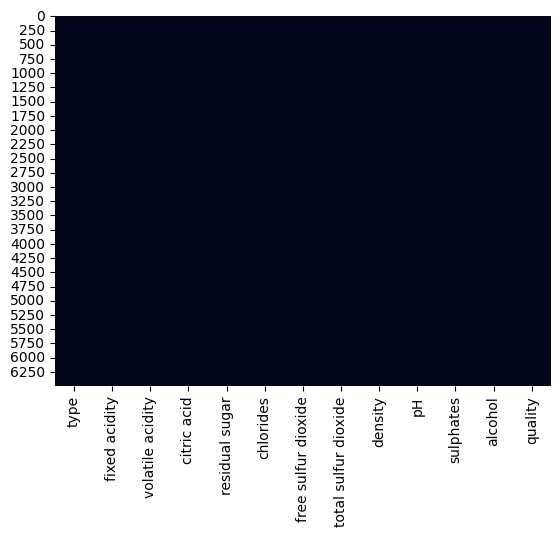

In [11]:
sns.heatmap(wine_df.isnull(), cbar=False)

Text(0.5, 1.0, 'Distribution of Red vs White Wines')

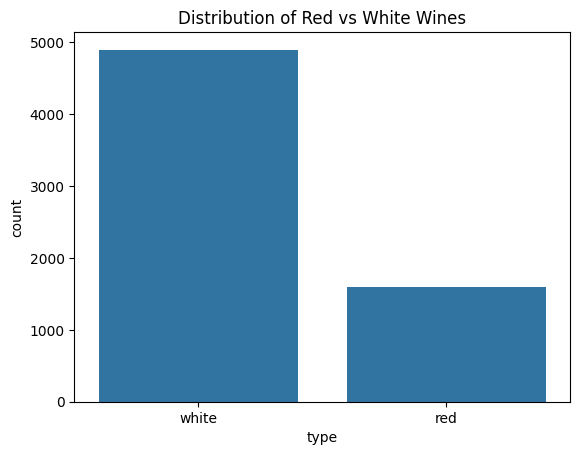

In [12]:
sns.countplot(x='type', data=wine_df)
plt.title('Distribution of Red vs White Wines')

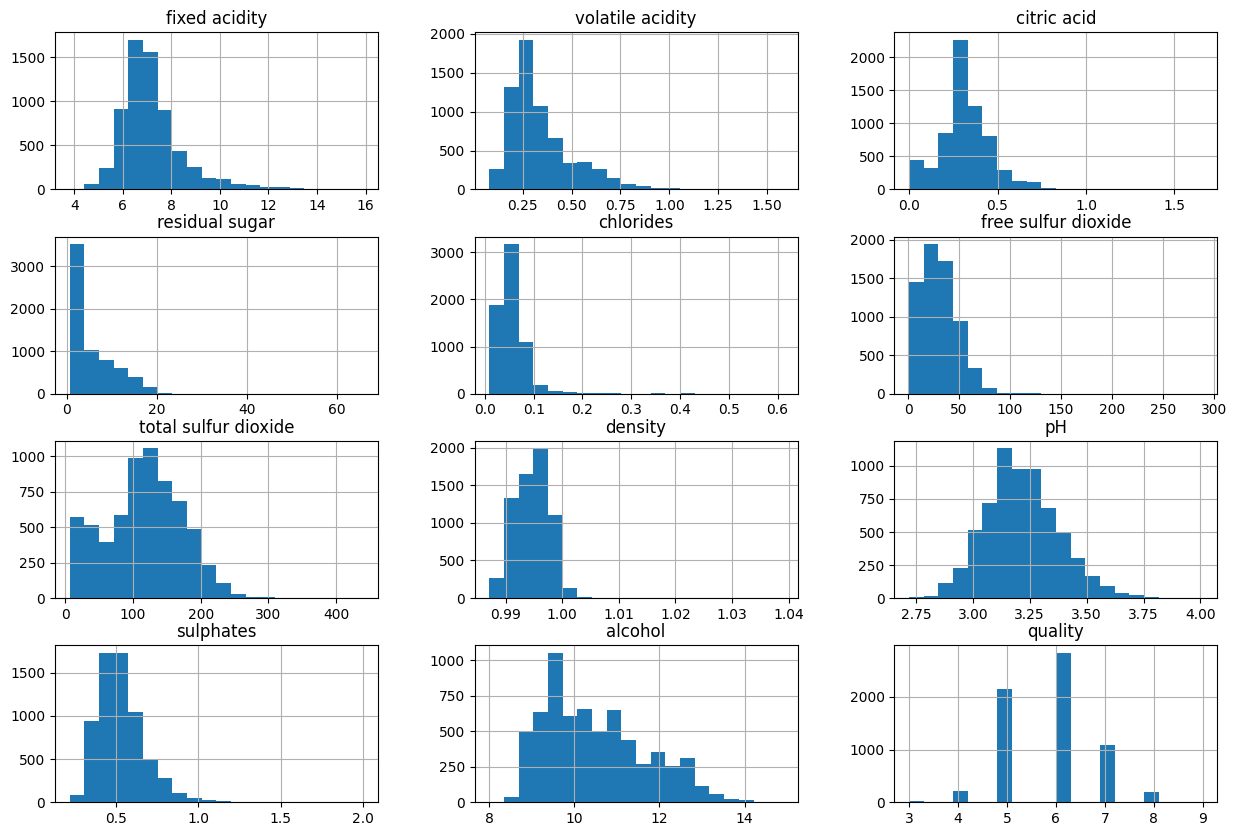

In [13]:
wine_df.hist(bins=20, figsize=(15, 10))
plt.show()

<Axes: xlabel='type', ylabel='alcohol'>

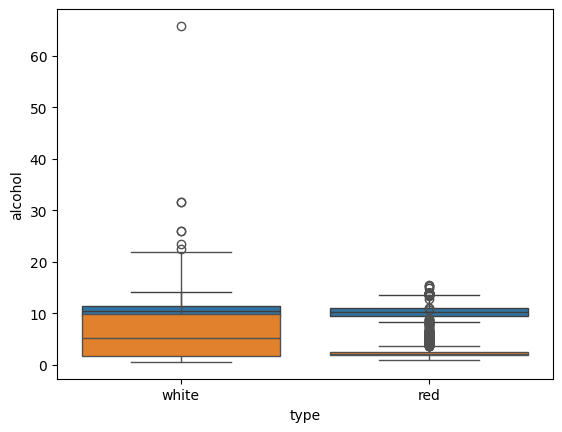

In [14]:
sns.boxplot(x='type', y='alcohol', data=wine_df)
sns.boxplot(x='type', y='residual sugar', data=wine_df)


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_df['type_encoded'] = le.fit_transform(wine_df['type'])  # red=0, white=1


In [16]:
X = wine_df.drop(['type', 'type_encoded'], axis=1)
y = wine_df['type_encoded']


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.9946153846153846
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300


Random Forest
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300


SVM
Accuracy: 0.9969230769230769
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300



Logistic Regression
Accuracy: 0.9946153846153846
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



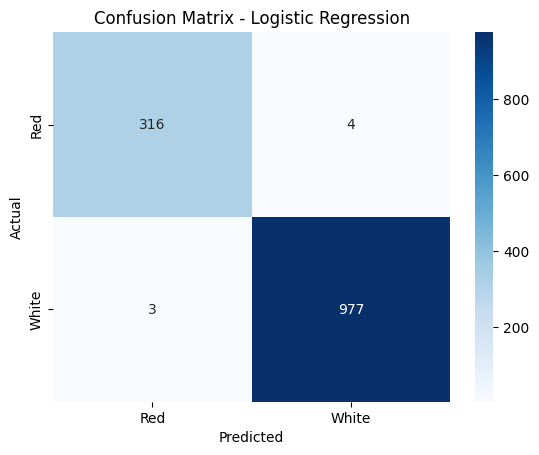


Random Forest
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



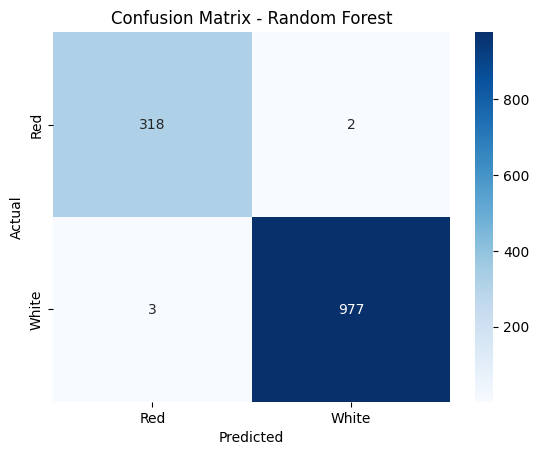


SVM
Accuracy: 0.9969230769230769
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      1.00      1300
weighted avg       1.00      1.00      1.00      1300



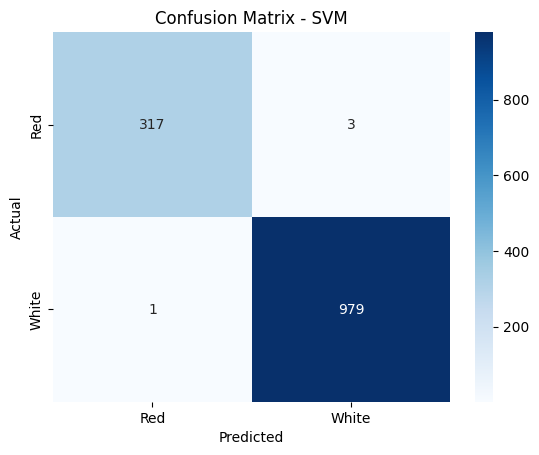

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Red','White'], yticklabels=['Red','White'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)


In [22]:
from sklearn.svm import SVC
model = SVC(C=0.5, kernel='rbf')  # lower C adds regularization


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.8, penalty='l2', solver='liblinear')


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation mean accuracy:", scores.mean())


Cross-validation mean accuracy: 0.9803007046840765



Logistic Regression
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



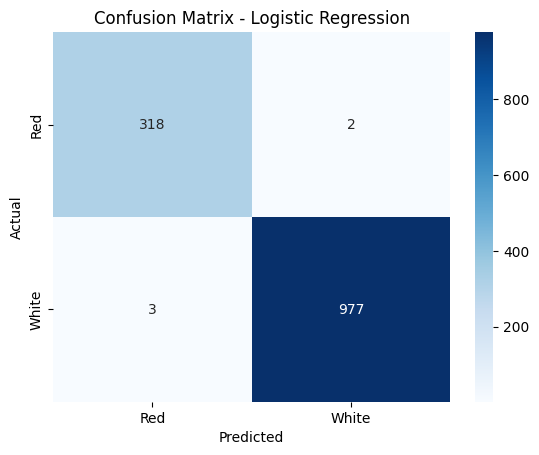


Random Forest
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



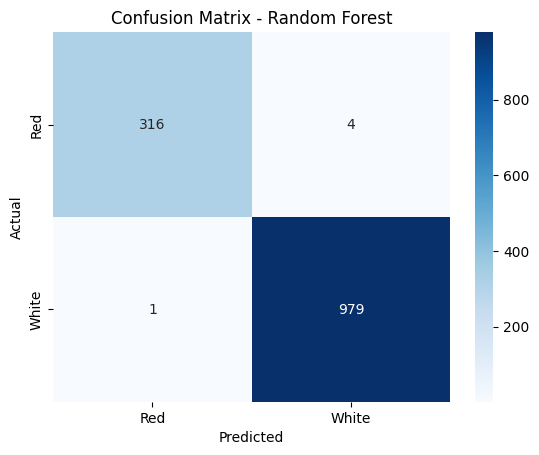


SVM
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



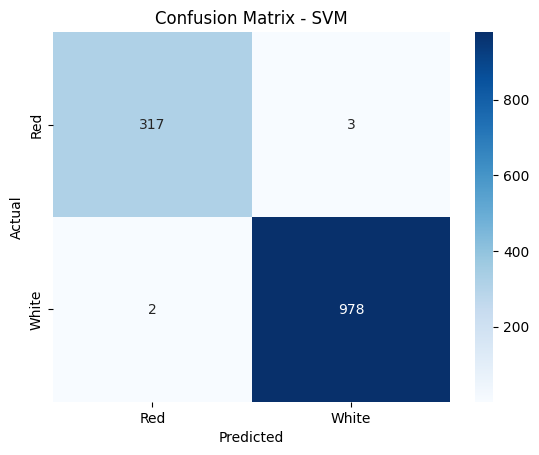

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(C=0.8, penalty='l2', solver='liblinear'),
    'Random Forest':RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42),
    'SVM': SVC(C=0.5, kernel='rbf')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Red','White'], yticklabels=['Red','White'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [26]:
wine_df['type'].value_counts(normalize=True)


type
white    0.753886
red      0.246114
Name: proportion, dtype: float64

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [29]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_bal, y_train_bal)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
y_pred_bal = model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred_bal)
print("Accuracy after SMOTE:", accuracy)

Accuracy after SMOTE: 0.9961538461538462


In [32]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



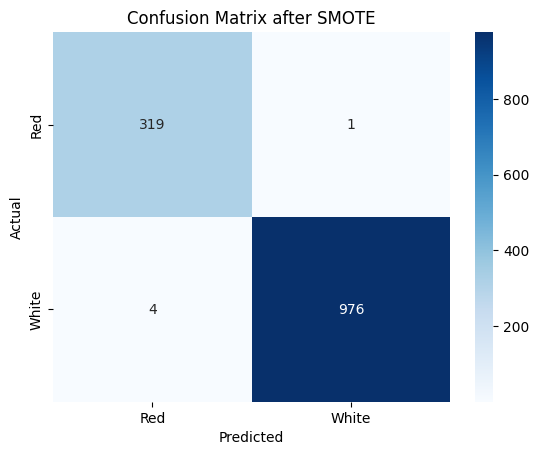

In [33]:
cm = confusion_matrix(y_test, y_pred_bal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red','White'], yticklabels=['Red','White'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after SMOTE')
plt.show()

In [34]:
import numpy as np

importance = np.abs(model.coef_[0])
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


                 Feature  Importance
7                density    4.714664
3         residual sugar    3.075627
6   total sulfur dioxide    2.609604
10               alcohol    1.858680
1       volatile acidity    1.149921
4              chlorides    0.807593
5    free sulfur dioxide    0.697456
9              sulphates    0.447948
11               quality    0.284082
2            citric acid    0.268225
0          fixed acidity    0.267214
8                     pH    0.032195


In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())


Cross-validation scores: [0.97538462 0.98692308 0.99384142 0.98229407 0.98383372]
Average accuracy: 0.9844553798780128


In [36]:
from sklearn.metrics import roc_auc_score, classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300

ROC AUC Score: 0.999123086734694
